In this project we will see how can we add a watermark to an image. Adding a watermark works as a copyright for your images, so that no one can illegally use your image or document. We will use openCV for this project to add logo and text as a watermark.

In [12]:
# importing all libraries

import cv2
import numpy as np
import requests
from PIL import Image
from numpy import asarray

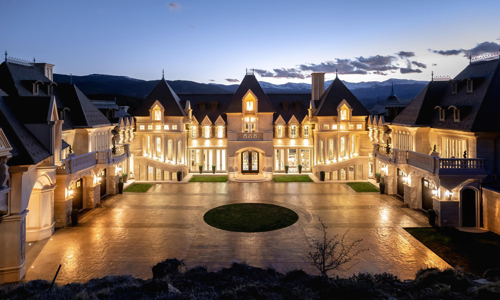

In [40]:
# Reading image from URl

image = Image.open(requests.get('https://www.jamesedition.com/stories/wp-content/uploads/2020/12/2_Colorado.jpg', stream = True).raw)
image_logow = image.resize((500, 300))  # resizing image and storing it for logo watermarking
image_textw = image.resize((500, 300))  # resizing image and storing it for text watermarking
image_logow


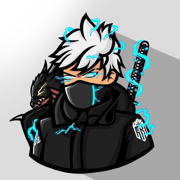

In [41]:
# reading logo from url
logo  = Image.open(requests.get('https://i.pinimg.com/1200x/18/1a/ea/181aea0fb542147917a96a850ab318dd.jpg', stream = True).raw)
logo = logo.resize((180, 180))
logo


In order to use these images we will first convert them into rgb format and store it as a numpy array. Similarly, we will also extract the shape i.e. its height and width

In [42]:
# converting the image into RGB format

# for background image
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _image = image_logow.shape

# for logo
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _logo = logo.shape


In [43]:
# Get the center of the original. it's the location where we will place the watermark

# to find the center of the image
center_y = int(h_image / 2)
center_x = int(w_image / 2)

# to find the coners of image where you want to put logo
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

HERE, we will place our watermark in the center of the image so for that we need to calculate the center of the image. here we will find out the center coordinates of the image using height and width of the image

In [46]:
# finding region of interest (ROI)

roi = image_logow[top_y: bottom_y, left_x: right_x]

# adding the logo to the ROI
alpha = 0.5
#beta = 1-alpha
#src1= roi
#src2 = logo
#result = cv2.addWeighted(src1,alpha,src2,beta,0)
result = cv2.addWeighted(roi, alpha, logo, 1-alpha, 0)

# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
                                      
# replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

Now we convert the image from array to RGB and visualize it

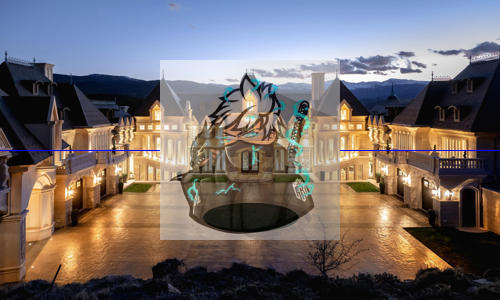

In [47]:
# Ploting logo watermarking image
img = Image.fromarray(image_logow, 'RGB')
img


Now doing text Watermark

In [49]:
# text watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='dipesh', org=(w_image - 95, h_image - 10), fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color= (0, 0, 255), thickness = 2, lineType = cv2.LINE_4);

Next we have to see how we can use text as a watermark. we will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using put Text() function of OpenCV. Here we can use different faeatures like size of the text, thickness if the text, font family etc.

To visualize the image we need to convert it back to RGB format

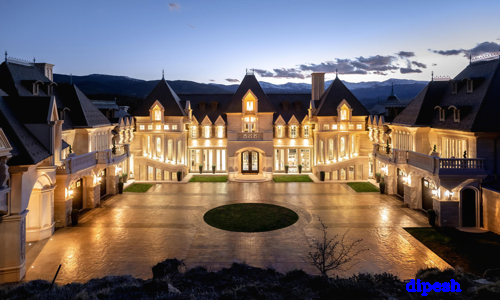

In [51]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg